# DS 7333 - Quantifying the World
## Case Study #6: "Searching for Exotic Particles in High-Energy Physics with Deep Learning"¶

Sterling Beason, Sean Kennedy, Emil Ramos

In [25]:
import pandas as pd
#tf.logging.set_verbosity(tf.logging.ERROR)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow.keras.metrics as tf_metrics
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.3.0


### Import Data (subset)

In [6]:
# import data
nrows = 1000000
data = pd.read_csv("./data/HIGGS.csv", nrows=nrows, header=None)
data[0] = data[0].astype(int)
print(f"Using {nrows} rows of entire dataset")
data.head()

Using 1000000 rows of entire dataset


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


### Partition Data

In [7]:
# Partition data
X = data.iloc[:,range(1,22)].values
y = data[0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7333)

### Build Model

In [32]:
# model
#tf.keras.backend.set_floatx('float64')


#They used tanh in paper

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [33]:
model.metrics

[]

### Train Model

In [34]:
# early stopping callback
es = EarlyStopping(monitor = "auc", min_delta = 0.01, patience = 4)

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    callbacks=[es],
    epochs=5, 
    batch_size=32
)

Epoch 1/5
25000/25000 [==============================] - 18s 734us/step - loss: 0.6706 - accuracy: 0.5980 - val_loss: 0.6435 - val_accuracy: 0.6270
Epoch 2/5
25000/25000 [==============================] - 19s 780us/step - loss: 0.6386 - accuracy: 0.6324 - val_loss: 0.6406 - val_accuracy: 0.6342
Epoch 3/5
25000/25000 [==============================] - 20s 782us/step - loss: 0.6346 - accuracy: 0.6391 - val_loss: 0.6265 - val_accuracy: 0.6495
Epoch 4/5
25000/25000 [==============================] - 18s 706us/step - loss: 0.6276 - accuracy: 0.6469 - val_loss: 0.6195 - val_accuracy: 0.6568
Epoch 5/5
25000/25000 [==============================] - 16s 656us/step - loss: 0.6238 - accuracy: 0.6530 - val_loss: 0.6223 - val_accuracy: 0.6568


### Evaluate Model

Accuracy: 0.6677550077438354


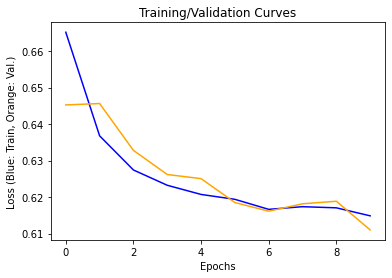

In [7]:
model_scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', model_scores[1])

plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.ylabel('Loss (Blue: Train, Orange: Val.)')
plt.xlabel('Epochs')
plt.title('Training/Validation Curves')
plt.show()